In [ ]:
Завдання:

Створення власного набору даних для класифікації:

Бінарна класифікація: Створіть набір даних, де кожен запис представляє два числові атрибути та бінарний класовий лейбл (наприклад, "0" або "1"). Ці дані можуть бути синтетичними та містити, наприклад, оцінки студентів та їхній успіх (пройшов/не пройшов).
Мультикласова класифікація: Розширте набір даних для включення більше ніж двох класів (наприклад, "низький", "середній", "високий").
Побудова нейронної мережі для класифікації:

Розробіть нейронну мережу з трьома повнозв'язними шарами для класифікації. Використовуйте відповідні функції активації (наприклад, ReLU для прихованих шарів та sigmoid для виходу в бінарній класифікації або softmax для мультикласової).
Навчіть модель на вашому власному наборі даних для класифікації (50 епох) та оцініть її ефективність.
Експерименти з покращенням результатів:

Спробуйте побудувати більшу модель, додавши четвертий повнозв'язний шар.
Збільште кількість нейронів у кожному шарі.
Використовуйте оптимізатор Adam та експериментуйте із зміною його першого параметра (швидкість навчання) з використанням callback.
Протестуйте, як змінюється продуктивність моделі при тренуванні протягом 300 епох.
Візуалізація процесу навчання:

Здійсніть візуалізацію зміни функції втрат та точності на тренувальному та тестувальному наборах даних під час тренування моделі.

In [ ]:
Бінарна та Мультикласова класифікації:
Створення набору даних:



In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Створення синтетичного набору даних для бінарної класифікації
X_binary, y_binary = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Розподіл на тренувальний та тестовий набори
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Створення синтетичного набору даних для мультикласової класифікації
X_multi, y_multi = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42
)

# Розподіл на тренувальний та тестовий набори
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Нормалізація даних
scaler = StandardScaler()
X_binary_train = scaler.fit_transform(X_binary_train)
X_binary_test = scaler.transform(X_binary_test)

X_multi_train = scaler.fit_transform(X_multi_train)
X_multi_test = scaler.transform(X_multi_test)


In [ ]:
Розробка та навчання моделі:


In [15]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Функція для створення моделі
def create_model(input_dim, output_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(output_dim, activation='sigmoid' if output_dim == 1 else 'softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy' if output_dim == 1 else 'categorical_crossentropy', metrics=['accuracy'])
    return model

# Навчання моделі для бінарної класифікації
model_binary = create_model(input_dim=2, output_dim=1)
history_binary = model_binary.fit(X_binary_train, y_binary_train, epochs=50, validation_data=(X_binary_test, y_binary_test), callbacks=[EarlyStopping(patience=5)])

# Навчання моделі для мультикласової класифікації
num_classes = len(np.unique(y_multi))
model_multi = create_model(input_dim=2, output_dim=num_classes)
history_multi = model_multi.fit(X_multi_train, tf.keras.utils.to_categorical(y_multi_train), epochs=50, validation_data=(X_multi_test, tf.keras.utils.to_categorical(y_multi_test)), callbacks=[EarlyStopping(patience=5)])



Epoch 1/50
25/25 [==============================] - 3s 28ms/step - loss: 0.5553 - accuracy: 0.8737 - val_loss: 0.4791 - val_accuracy: 0.9150
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3963 - accuracy: 0.9137 - val_loss: 0.3556 - val_accuracy: 0.8950
Epoch 3/50
25/25 [==============================] - 0s 11ms/step - loss: 0.2911 - accuracy: 0.9050 - val_loss: 0.2869 - val_accuracy: 0.8950
Epoch 4/50
25/25 [==============================] - 0s 8ms/step - loss: 0.2374 - accuracy: 0.9025 - val_loss: 0.2556 - val_accuracy: 0.9000
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9112 - val_loss: 0.2407 - val_accuracy: 0.9100
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.1981 - accuracy: 0.9150 - val_loss: 0.2300 - val_accuracy: 0.9100
Epoch 7/50
25/25 [==============================] - 0s 20ms/step - loss: 0.1882 - accuracy: 0.9250 - val_loss: 0.2216 - val_accuracy: 0.9150
Epoch 8/50
25/25

Epoch 1/50
25/25 [==============================] - 2s 30ms/step - loss: 1.0173 - accuracy: 0.5638 - val_loss: 0.8772 - val_accuracy: 0.8150
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.7541 - accuracy: 0.8475 - val_loss: 0.6594 - val_accuracy: 0.8250
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 0.5608 - accuracy: 0.8600 - val_loss: 0.5022 - val_accuracy: 0.8700
Epoch 4/50
25/25 [==============================] - 0s 10ms/step - loss: 0.4360 - accuracy: 0.8763 - val_loss: 0.4072 - val_accuracy: 0.8700
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3638 - accuracy: 0.8750 - val_loss: 0.3513 - val_accuracy: 0.8700
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.3282 - accuracy: 0.8838 - val_loss: 0.3252 - val_accuracy: 0.8650
Epoch 7/50
25/25 [==============================] - 0s 12ms/step - loss: 0.3090 - accuracy: 0.8825 - val_loss: 0.3152 - val_accuracy: 0.8850
Epoch 8/50
25/25 

In [ ]:
Експерименти та візуалізація:

In [19]:
# Експерименти з покращенням
# Додаємо четвертий повнозв'язаний шар
model_binary_exp = create_model(input_dim=2, output_dim=1)
model_binary_exp.add(Dense(16, activation='relu'))
model_binary_exp.add(Dense(1, activation='sigmoid'))
model_binary_exp.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_binary_exp = model_binary_exp.fit(X_binary_train, y_binary_train, epochs=50, validation_data=(X_binary_test, y_binary_test), callbacks=[EarlyStopping(patience=5)])

# Збільшуємо кількість нейронів у кожному шарі
model_binary_exp2 = create_model(input_dim=2, output_dim=1)
model_binary_exp2.add(Dense(128, activation='relu'))
model_binary_exp2.add(Dense(64, activation='relu'))
model_binary_exp2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_binary_exp2 = model_binary_exp2.fit(X_binary_train, y_binary_train, epochs=50, validation_data=(X_binary_test, y_binary_test), callbacks=[EarlyStopping(patience=5)])

# Змінюємо швидкість навчання з використанням callback
model_binary_exp3 = create_model(input_dim=2, output_dim=1)
model_binary_exp3.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_binary_exp3 = model_binary_exp3.fit(X_binary_train, y_binary_train, epochs=50, validation_data=(X_binary_test, y_binary_test), callbacks=[EarlyStopping(patience=5)])

# Тренування моделі протягом 300 епох
model_binary_exp4 = create_model(input_dim=2, output_dim=1)
history_binary_exp4 = model_binary_exp4.fit(X_binary_train, y_binary_train, epochs=300, validation_data=(X_binary_test, y_binary_test), callbacks=[EarlyStopping(patience=5)])



Epoch 1/50
25/25 [==============================] - 4s 22ms/step - loss: 0.6914 - accuracy: 0.5038 - val_loss: 0.6894 - val_accuracy: 0.4800
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6809 - accuracy: 0.5075 - val_loss: 0.6741 - val_accuracy: 0.4950
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.6573 - accuracy: 0.5925 - val_loss: 0.6470 - val_accuracy: 0.6650
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.6266 - accuracy: 0.7487 - val_loss: 0.6183 - val_accuracy: 0.8350
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5982 - accuracy: 0.8888 - val_loss: 0.5927 - val_accuracy: 0.8800
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.5728 - accuracy: 0.9212 - val_loss: 0.5704 - val_accuracy: 0.9150
Epoch 7/50
25/25 [==============================] - 0s 11ms/step - loss: 0.5499 - accuracy: 0.9250 - val_loss: 0.5502 - val_accuracy: 0.9100
Epoch 8/50
25/25 

Epoch 1/50
25/25 [==============================] - 2s 21ms/step - loss: 4.1199 - accuracy: 0.0000e+00 - val_loss: 3.7403 - val_accuracy: 0.0000e+00
Epoch 2/50
25/25 [==============================] - 0s 8ms/step - loss: 3.8524 - accuracy: 0.0000e+00 - val_loss: 3.6246 - val_accuracy: 0.0000e+00
Epoch 3/50
25/25 [==============================] - 0s 9ms/step - loss: 3.7582 - accuracy: 0.0000e+00 - val_loss: 3.5599 - val_accuracy: 0.0000e+00
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 3.7010 - accuracy: 0.0000e+00 - val_loss: 3.5168 - val_accuracy: 0.0000e+00
Epoch 5/50
25/25 [==============================] - 0s 9ms/step - loss: 3.6603 - accuracy: 0.0000e+00 - val_loss: 3.4904 - val_accuracy: 0.0000e+00
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 3.6335 - accuracy: 0.0000e+00 - val_loss: 3.4732 - val_accuracy: 0.0000e+00
Epoch 7/50
25/25 [==============================] - 0s 7ms/step - loss: 3.6158 - accuracy: 0.0000e+00 - val_los

Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.2811 - accuracy: 0.8863 - val_loss: 0.2285 - val_accuracy: 0.9150
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.1558 - accuracy: 0.9337 - val_loss: 0.2291 - val_accuracy: 0.9050
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.1440 - accuracy: 0.9362 - val_loss: 0.2080 - val_accuracy: 0.9250
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.1442 - accuracy: 0.9337 - val_loss: 0.2145 - val_accuracy: 0.9200
Epoch 5/50
25/25 [==============================] - 0s 16ms/step - loss: 0.1433 - accuracy: 0.9275 - val_loss: 0.2058 - val_accuracy: 0.9250
Epoch 6/50
25/25 [==============================] - 0s 8ms/step - loss: 0.1372 - accuracy: 0.9400 - val_loss: 0.1905 - val_accuracy: 0.9350
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.1317 - accuracy: 0.9413 - val_loss: 0.1955 - val_accuracy: 0.9350
Epoch 8/50
25/25 [

Epoch 1/300
25/25 [==============================] - 2s 21ms/step - loss: 0.4938 - accuracy: 0.8813 - val_loss: 0.4084 - val_accuracy: 0.8600
Epoch 2/300
25/25 [==============================] - 0s 7ms/step - loss: 0.3343 - accuracy: 0.9000 - val_loss: 0.3073 - val_accuracy: 0.8850
Epoch 3/300
25/25 [==============================] - 0s 11ms/step - loss: 0.2569 - accuracy: 0.9013 - val_loss: 0.2628 - val_accuracy: 0.8950
Epoch 4/300
25/25 [==============================] - 0s 9ms/step - loss: 0.2218 - accuracy: 0.9025 - val_loss: 0.2436 - val_accuracy: 0.9000
Epoch 5/300
25/25 [==============================] - 0s 6ms/step - loss: 0.2026 - accuracy: 0.9100 - val_loss: 0.2326 - val_accuracy: 0.9050
Epoch 6/300
25/25 [==============================] - 0s 6ms/step - loss: 0.1895 - accuracy: 0.9125 - val_loss: 0.2235 - val_accuracy: 0.9100
Epoch 7/300
25/25 [==============================] - 0s 6ms/step - loss: 0.1793 - accuracy: 0.9262 - val_loss: 0.2158 - val_accuracy: 0.9150
Epoch 8/300

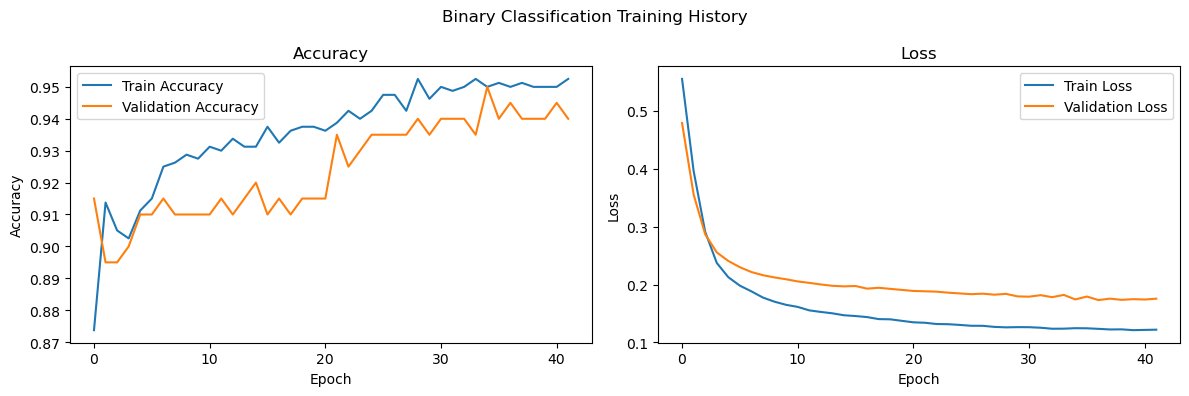

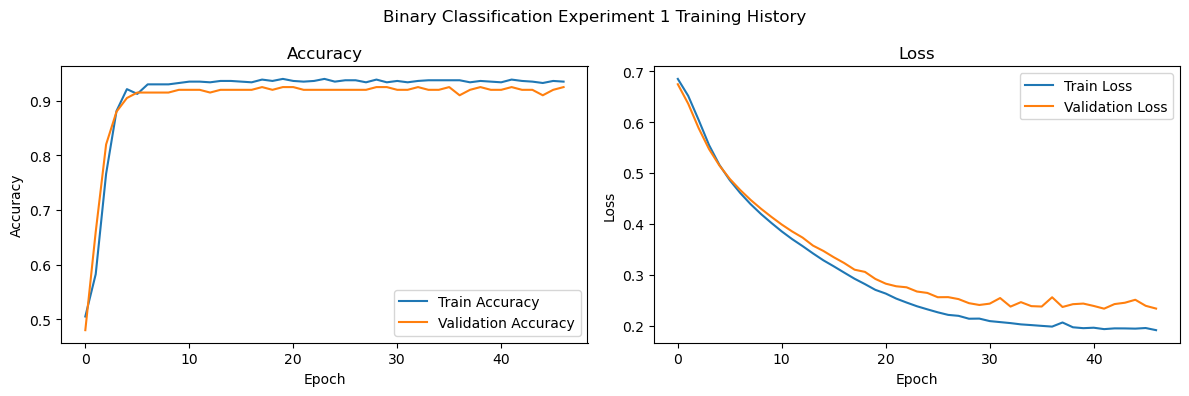

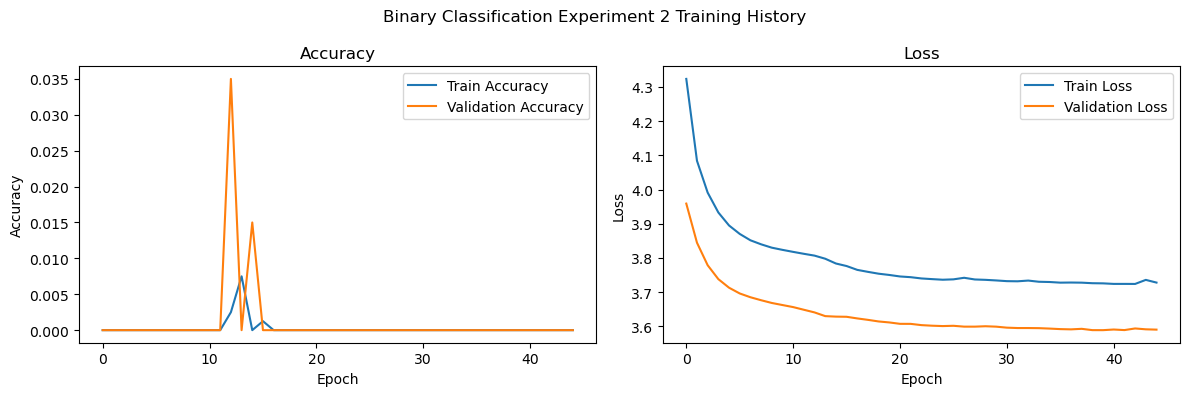

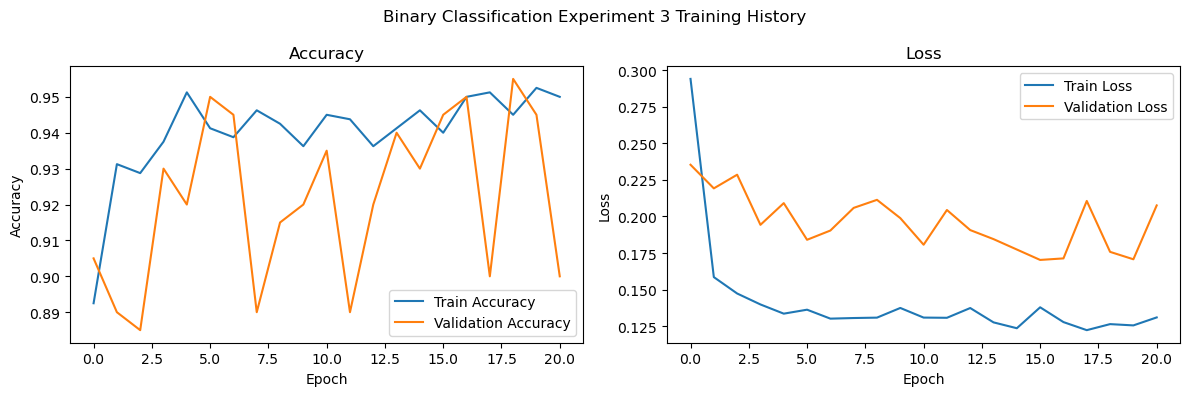

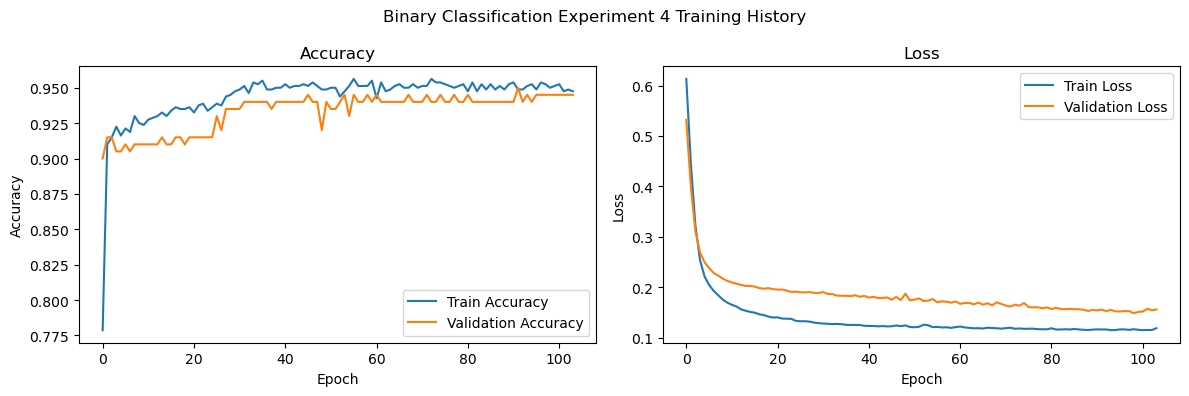

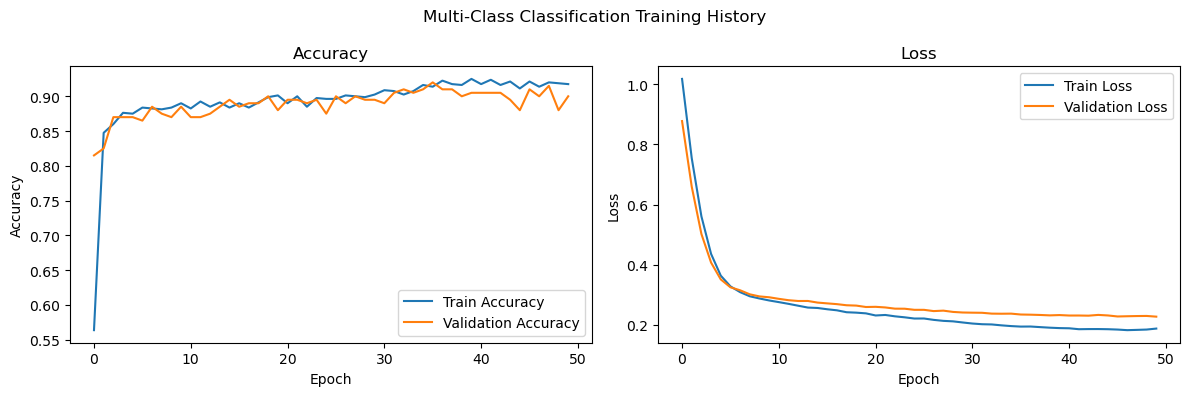

In [18]:
import matplotlib.pyplot as plt

# Візуалізація процесу навчання
def plot_training_history(history, title):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Графік точності
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()

    # Графік функції втрат
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()

    # Відображення заголовка
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Візуалізація для бінарної класифікації
plot_training_history(history_binary, 'Binary Classification Training History')
plot_training_history(history_binary_exp, 'Binary Classification Experiment 1 Training History')
plot_training_history(history_binary_exp2, 'Binary Classification Experiment 2 Training History')
plot_training_history(history_binary_exp3, 'Binary Classification Experiment 3 Training History')
plot_training_history(history_binary_exp4, 'Binary Classification Experiment 4 Training History')

# Візуалізація для мультикласової класифікації
plot_training_history(history_multi, 'Multi-Class Classification Training History')
